<a href="https://colab.research.google.com/github/Kolawole-a2/Kola_Projects/blob/main/AFOLABI_SEAS8410_DC8_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📝 **Work Note Summary: CISO Log Analysis Dashboard (Colab Version)**

This notebook processes a structured log file (HW6_logs.txt) containing three types of security events:

**⦁	user_event:** login actions (including failed logins)

**⦁	app_event:** app lifecycle events (e.g., crashes)

**⦁	network_event:** network communications with packet size metadata


✅ **Main Functions:**

**1.	Interactive File Upload using ipywidgets**

**2. Event Classification into user, app, and network categories based on row structure**

**3. Concern Area Detection:**

⦁	Failed user login attempts

⦁	App crash events

⦁	Network packets exceeding 12,000 bytes


**4.Data Visualization:**

⦁	Bar charts for failed logins and crashes

⦁	Histogram for large packets

⦁	IP-to-IP communication graph


**5. Data Tables:**

⦁	Displays full DataFrames for each concern area (limited to top 30 in report)


**6. PDF Report Generation using reportlab:**

⦁	Includes metrics, visual charts, and tables

⦁	Downloadable directly from Colab



**📁Output:**

⦁	CISO_Dashboard_FullReport.pdf: Complete summary of visual and tabular insights



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00


HTML(value='<h3>Upload your HW6_logs.txt file</h3>')

FileUpload(value={}, accept='.txt', description='Upload')

🔐 Summary of Concern Areas
• Failed login attempts: 1645
• App crashes: 5122
• Network packets > 12000 bytes: 7196


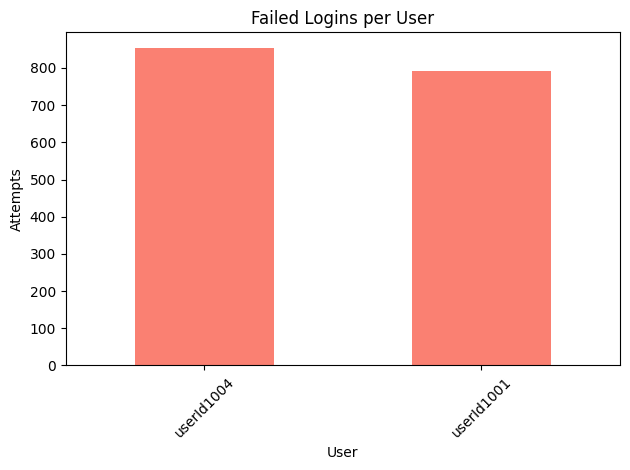

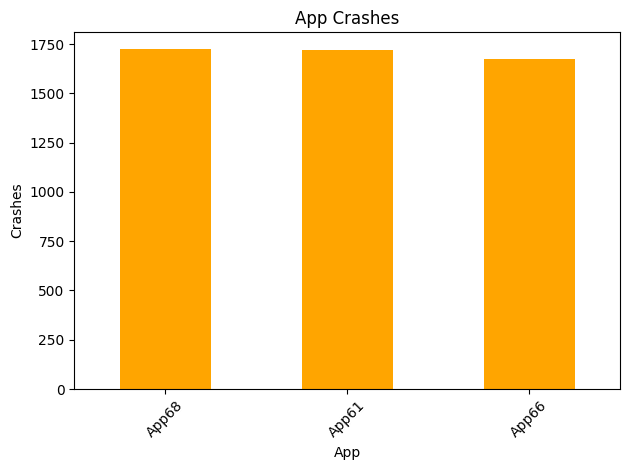

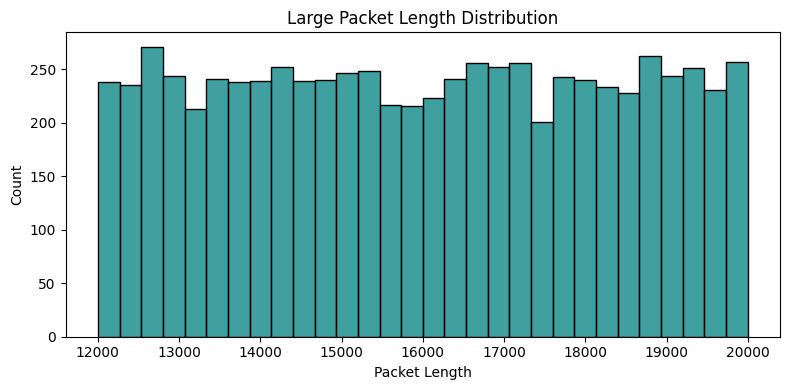

🌐 Network Communication Graph


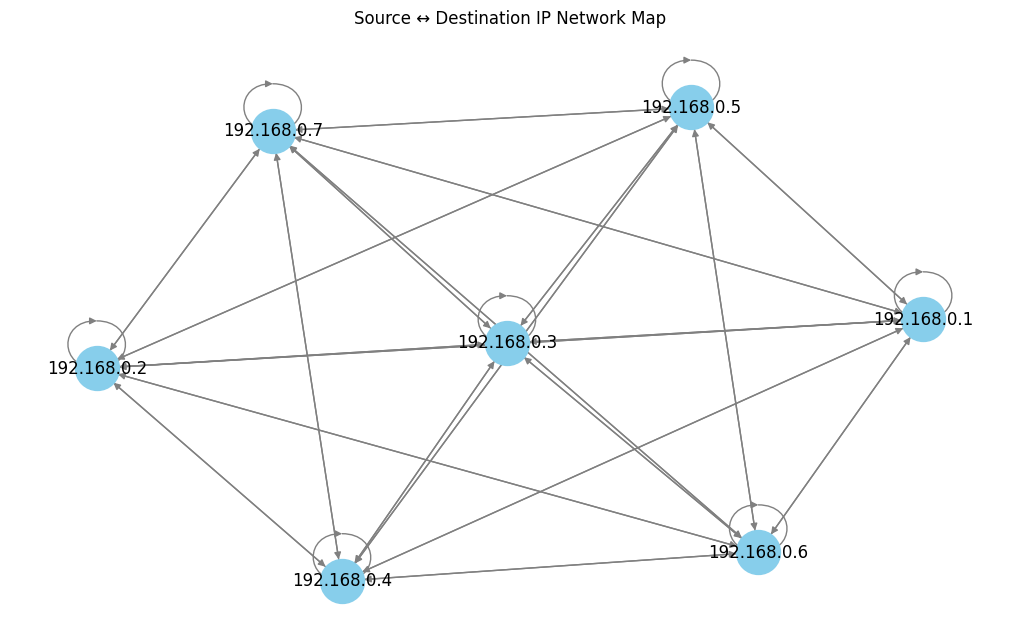


📄 FULL Failed Logins


,event_type,timestamp,user,action,ip
7,user_event,2023-05-10 00:10:01,userId1004,user_failed_login,192.168.0.2
21,user_event,2023-05-10 00:10:01,userId1004,user_failed_login,192.168.0.4
40,user_event,2023-05-10 00:10:01,userId1001,user_failed_login,192.168.0.3
49,user_event,2023-05-10 00:10:01,userId1004,user_failed_login,192.168.0.3
54,user_event,2023-05-10 00:10:01,userId1004,user_failed_login,192.168.0.6
...,...,...,...,...,...
16591,user_event,2023-05-10 00:10:02,userId1004,user_failed_login,192.168.0.1
16594,user_event,2023-05-10 00:10:02,userId1001,user_failed_login,192.168.0.4
16615,user_event,2023-05-10 00:10:02,userId1001,user_failed_login,192.168.0.3
16626,user_event,2023-05-10 00:10:02,userId1001,user_failed_login,192.168.0.6



📄 FULL App Crashes


,event_type,timestamp,app,action
4,app_event,2023-05-10 00:10:01,App61,app_crash
9,app_event,2023-05-10 00:10:01,App66,app_crash
10,app_event,2023-05-10 00:10:01,App61,app_crash
14,app_event,2023-05-10 00:10:01,App66,app_crash
30,app_event,2023-05-10 00:10:01,App66,app_crash
...,...,...,...,...
16718,app_event,2023-05-10 00:10:02,App68,app_crash
16720,app_event,2023-05-10 00:10:02,App68,app_crash
16721,app_event,2023-05-10 00:10:02,App61,app_crash
16722,app_event,2023-05-10 00:10:02,App66,app_crash



📄 FULL Large Packets


,event_type,timestamp,src_ip,dst_ip,action,packet_length
939,network_event,2023-05-10 00:10:01,192.168.0.4,192.168.0.5,network_connection,19995
10985,network_event,2023-05-10 00:10:01,192.168.0.2,192.168.0.1,network_connection,19994
13307,network_event,2023-05-10 00:10:01,192.168.0.7,192.168.0.2,network_connection,19994
7918,network_event,2023-05-10 00:10:01,192.168.0.4,192.168.0.6,network_connection,19994
3912,network_event,2023-05-10 00:10:01,192.168.0.2,192.168.0.5,network_connection,19991
...,...,...,...,...,...,...
14189,network_event,2023-05-10 00:10:02,192.168.0.4,192.168.0.5,network_connection,12009
12042,network_event,2023-05-10 00:10:01,192.168.0.4,192.168.0.2,network_connection,12008
14319,network_event,2023-05-10 00:10:02,192.168.0.4,192.168.0.5,network_connection,12007
8501,network_event,2023-05-10 00:10:01,192.168.0.2,192.168.0.5,network_connection,12006


/content/dashboard_report/CISO_Dashboard_FullReport.pdf

In [1]:
# Install packages
!pip install pandas matplotlib networkx seaborn reportlab --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import display, FileLink
import ipywidgets as widgets
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image as RLImage, Table, TableStyle, PageBreak
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
import io
import os

# Upload widget
upload = widgets.FileUpload(accept='.txt', multiple=False)
display(widgets.HTML("<h3>Upload your HW6_logs.txt file</h3>"))
display(upload)

# Report directory
os.makedirs("dashboard_report", exist_ok=True)

def df_to_table(df, max_rows=30):
    """Convert DataFrame to reportlab Table"""
    df = df.head(max_rows)  # Limit table size for readability
    data = [df.columns.tolist()] + df.values.tolist()
    table = Table(data, repeatRows=1)
    table.setStyle(TableStyle([
        ("BACKGROUND", (0, 0), (-1, 0), colors.lightblue),
        ("GRID", (0, 0), (-1, -1), 0.5, colors.grey),
        ("FONT", (0, 0), (-1, 0), "Helvetica-Bold"),
        ("FONTSIZE", (0, 0), (-1, -1), 8),
    ]))
    return table

def on_upload_change(change):
    if not upload.value:
        return

    # Step 1: Parse Logs
    content = list(upload.value.values())[0]['content']
    lines = content.decode("utf-8").splitlines()
    user_data, app_data, net_data = [], [], []

    for line in lines:
        parts = line.strip().split(",")
        if not parts: continue
        if parts[0] == "user_event" and len(parts) == 5:
            user_data.append(parts)
        elif parts[0] == "app_event" and len(parts) == 4:
            app_data.append(parts)
        elif parts[0] == "network_event" and len(parts) == 6:
            net_data.append(parts)

    user_df = pd.DataFrame(user_data, columns=["event_type", "timestamp", "user", "action", "ip"])
    app_df = pd.DataFrame(app_data, columns=["event_type", "timestamp", "app", "action"])
    net_df = pd.DataFrame(net_data, columns=["event_type", "timestamp", "src_ip", "dst_ip", "action", "packet_length"])
    net_df["packet_length"] = pd.to_numeric(net_df["packet_length"], errors="coerce")

    failed_users = user_df[user_df["action"] == "user_failed_login"]
    failed_counts = failed_users["user"].value_counts()

    crashed_apps = app_df[app_df["action"] == "app_crash"]
    crash_counts = crashed_apps["app"].value_counts()

    large_packets = net_df[net_df["packet_length"] > 12000]

    # Step 2: Display Summary
    print("🔐 Summary of Concern Areas")
    print(f"• Failed login attempts: {len(failed_users)}")
    print(f"• App crashes: {len(crashed_apps)}")
    print(f"• Network packets > 12000 bytes: {len(large_packets)}")

    chart_paths = []

    if not failed_counts.empty:
        failed_counts.plot(kind='bar', title="Failed Logins per User", color='salmon')
        plt.ylabel("Attempts"); plt.xlabel("User"); plt.xticks(rotation=45); plt.tight_layout()
        path = "dashboard_report/failed_logins.png"
        plt.savefig(path); chart_paths.append(path)
        plt.show()

    if not crash_counts.empty:
        crash_counts.plot(kind='bar', title="App Crashes", color='orange')
        plt.ylabel("Crashes"); plt.xlabel("App"); plt.xticks(rotation=45); plt.tight_layout()
        path = "dashboard_report/app_crashes.png"
        plt.savefig(path); chart_paths.append(path)
        plt.show()

    if not large_packets.empty:
        plt.figure(figsize=(8, 4))
        sns.histplot(large_packets["packet_length"], bins=30, color='teal')
        plt.title("Large Packet Length Distribution")
        plt.xlabel("Packet Length"); plt.tight_layout()
        path = "dashboard_report/packet_dist.png"
        plt.savefig(path); chart_paths.append(path)
        plt.show()

    print("🌐 Network Communication Graph")
    G = nx.from_pandas_edgelist(net_df, "src_ip", "dst_ip", create_using=nx.DiGraph())
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1000)
    plt.title("Source ↔ Destination IP Network Map")
    path = "dashboard_report/net_graph.png"
    plt.savefig(path); chart_paths.append(path)
    plt.show()

    # Show all full tables
    print("\n📄 FULL Failed Logins")
    display(failed_users)

    print("\n📄 FULL App Crashes")
    display(crashed_apps)

    print("\n📄 FULL Large Packets")
    display(large_packets.sort_values(by="packet_length", ascending=False))

    # Step 3: Generate PDF with Charts + Tables
    pdf_path = "dashboard_report/CISO_Dashboard_FullReport.pdf"
    doc = SimpleDocTemplate(pdf_path, pagesize=letter)
    styles = getSampleStyleSheet()
    flowables = [
        Paragraph("CISO Log Analysis Report", styles['Title']),
        Spacer(1, 12),
        Paragraph(f"Total Failed Logins: {len(failed_users)}", styles['Normal']),
        Paragraph(f"Total App Crashes: {len(crashed_apps)}", styles['Normal']),
        Paragraph(f"Total Large Packets > 12000: {len(large_packets)}", styles['Normal']),
        Spacer(1, 12)
    ]

    # Add charts
    for path in chart_paths:
        flowables.append(RLImage(path, width=500, height=300))
        flowables.append(Spacer(1, 12))

    flowables.append(PageBreak())

    # Add Tables (max 30 rows each for readability)
    flowables.append(Paragraph("Failed Login Events", styles['Heading2']))
    flowables.append(df_to_table(failed_users))
    flowables.append(Spacer(1, 12))

    flowables.append(Paragraph("App Crash Events", styles['Heading2']))
    flowables.append(df_to_table(crashed_apps))
    flowables.append(Spacer(1, 12))

    flowables.append(Paragraph("Large Network Packets", styles['Heading2']))
    flowables.append(df_to_table(large_packets.sort_values(by="packet_length", ascending=False)))
    flowables.append(Spacer(1, 12))

    doc.build(flowables)

    # Step 4: Download Link
    display(FileLink(pdf_path, result_html_prefix="⬇️ Click to download full report: "))

# Attach handler
upload.observe(on_upload_change, names='value')


In [2]:
from google.colab import files
files.download("dashboard_report/CISO_Dashboard_FullReport.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>